In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# Set notebook display
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# import data analysis libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def rank_boxplot_cumulative_shift(data, labels, reference_rank_index = 0):
    '''
    
    Data is a DataFrame
    The costructure of data is as following: columns are cities
                                             rows are different parameters
                                             elements in data are pefermance ranks
    
    labels is the legend displaying on the cumulative rank shift figure, do not include the reference rank row
    
    reference_rank_index is the index of the reference rank in the data, and is a int
    
    import nescessary modules:
    
        # Set notebook display
        %matplotlib inline
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('retina')
    
        # import data analysis libraries

        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
    '''
    
    # rank boxplot
    fig = plt.figure(num = 1, figsize = (20, 8))
    ax1 = plt.subplot(121)
    
    font = {'family' : 'serif', 
            'color'  : 'k', 
            'weight' : 'normal', 
            'size'   : 8
           } 
    
    meanprops = dict(marker = '^', markerfacecolor='none',
                     markersize=4, linestyle='none', linewidth = 0.5)
    
    sns.set_style('ticks')
    
    _, boxplot = data.boxplot(ax = ax1, grid = False,
                              showmeans = False, meanprops = meanprops, return_type = 'both')
    
    ax1.set_xticklabels(list(data.columns),rotation = 'vertical', 
                        fontdict=font, ha = 'center', va = 'baseline')
    ax1.set_ylabel("Low-carbon Performance Rank", fontdict=font, ha = 'center')
   
    
    # generate a new DataFrame for store the rank shift with respect to the reference rank. Here, 
    # the reference rank is the rank without consideration of thresholds
    def rank_shift(data, reference_rank_row_index):
        rank_shift_data_frame = pd.DataFrame(index=data.index, columns=data.columns)
        
        rank_shift_data_frame.drop(reference_rank_row_index, inplace = True)
        
        rows, columns = rank_shift_data_frame.shape
        
        for column in range(columns):
            for row in range(rows):
                rank_shift_data_frame.iloc[row, column] = data.iloc[row+1, column] - data.iloc[0, column]
                
        return rank_shift_data_frame

    rank_shift_data = rank_shift(data, data.index[reference_rank_index])
    
    # cumulative rank shift and average rank shift plot
    ax2 = plt.subplot(122)
    par = ax2.twinx()
    
    average_rank_shift = rank_shift_data.sum()/len(rank_shift_data.index)
    

    
    stacked_bar = rank_shift_data.T.plot.bar(ax = ax2, stacked=True, colormap='tab20')
    average_rank_shift.plot.line(ax = par, color = 'k', linestyle='--', label = 'Average Rank Shift')
    
    ax2.set_xticklabels(list(rank_shift_data.T.index), fontdict=font)
    ax2.set_ylabel("Cumulative Rank Shift", fontdict=font, ha = 'center')
    
    par.set_ylabel("Average Rank Shift", fontdict=font, ha = 'center')
    
    ax2.legend(loc='lower left', shadow=True, fontsize='small', labels = labels, ncol=5)
    
    par.legend(loc = 'best', fontsize = 'small')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# equal_thres

In [5]:
equal_thres_phi03_path = os.path.join(os.path.abspath('..'), 'results', 
                                       'outranking_matrix','equal_threshod_00_10_phi0.3', 'total_rank_1.csv')

if os.path.exists(equal_thres_phi03_path):
    print('File path: ', equal_thres_phi03_path)
else:
    print('Check the path')

    
equal_thres_phi03_data = pd.read_csv(equal_thres_phi03_path, index_col = 0)

equal_thres_phi03_data.head()

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/equal_threshod_00_10_phi0.3/total_rank_1.csv


,ref,equal_threshold_00,equal_threshold_01,equal_threshold_02,equal_threshold_03,equal_threshold_04,equal_threshold_05,equal_threshold_06,equal_threshold_07,equal_threshold_08,equal_threshold_09,equal_threshold_10
Beijing,1.0,2,2,1,1,1,1,1.0,1,1,1,1
Tianjin,35.0,29,29,29,31,33,34,35.0,37,36,32,35
Shijiazhuang,30.0,33,34,34,32,29,28,29.0,28,27,29,30
Qinhuangdao,21.0,27,26,24,24,21,19,18.0,16,18,22,21
Baoding,32.5,36,37,35,30,30,31,33.0,32,33,30,32


In [6]:
equal_thres_phi03_data_trans = equal_thres_phi03_data.T

equal_thres_phi03_data_trans.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
ref,1.0,35.0,30.0,21.0,32.5,39.0,9.0,34.0,11.0,32.5,...,38.0,10.0,40.0,5.0,13.0,36.0,8.0,25.0,18.0,7.0
equal_threshold_00,2.0,29.0,33.0,27.0,36.0,40.0,13.0,31.0,9.0,28.0,...,39.0,7.0,38.0,8.0,10.0,37.0,5.0,24.0,23.0,16.0
equal_threshold_01,2.0,29.0,34.0,26.0,37.0,40.0,12.0,33.0,8.0,31.0,...,39.0,9.0,38.0,7.0,11.0,35.0,6.0,22.0,24.0,14.0
equal_threshold_02,1.0,29.0,34.0,24.0,35.0,40.0,14.0,33.0,7.0,32.0,...,38.0,13.0,39.0,11.0,8.0,36.0,9.0,21.0,25.0,12.0
equal_threshold_03,1.0,31.0,32.0,24.0,30.0,40.0,15.0,35.0,5.0,34.0,...,37.0,13.0,39.0,8.0,11.0,36.0,10.0,18.0,25.0,9.0


In [7]:
labels_eqth = [r'$EqTh-1$',r'$EqTh-2$', r'$EqTh-3$', r'$EqTh-4$',
               r'$EqTh-5$', r'$EqTh-6$', r'$EqTh-7$', r'$EqTh-8$',
               r'$EqTh-9$', r'$EqTh-10$']

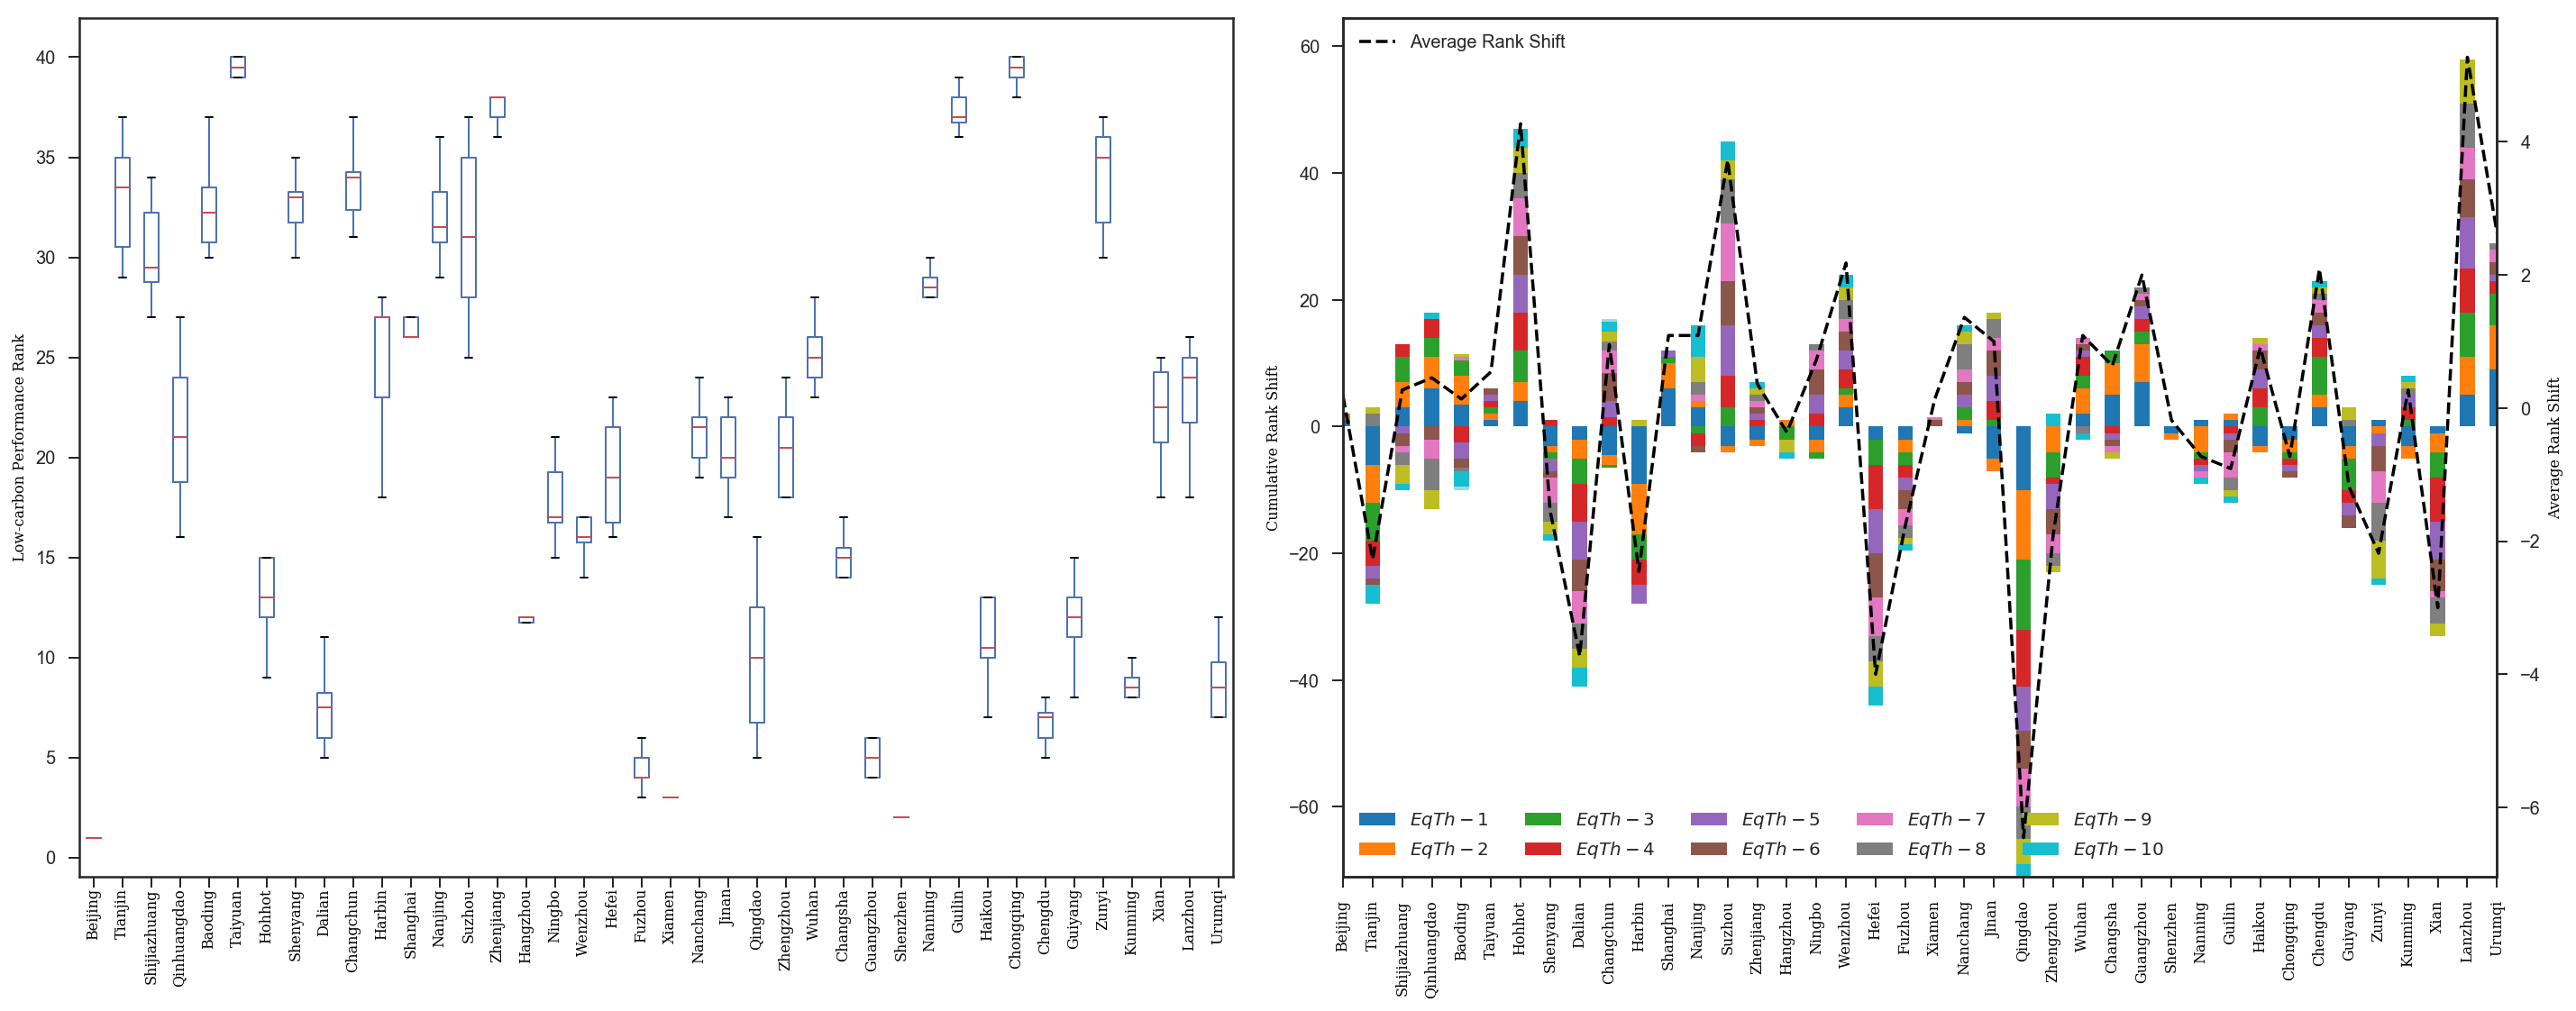

In [9]:
fig_eqth = rank_boxplot_cumulative_shift(equal_thres_phi03_data_trans, labels_eqth)

In [10]:
fig_eqth.savefig('../results/fig_equal_threshod_1.pdf')

# indifference_threhold_00_10_phi0.3
## total_rank_pre_10

In [6]:
indiff_thres_phi03_path = os.path.join(os.path.abspath('..'), 'results', 
                                                       'outranking_matrix','indifference_threhold_00_10_phi0.3', 
                                                       'total_rank_pre_10_1.csv')

if os.path.exists(indiff_thres_phi03_path):
    print('File path: ', indiff_thres_phi03_path)
else:
    print('Check the path')

indiff_thres_phi03_data = pd.read_csv(indiff_thres_phi03_path, index_col = 0)

indiff_thres_phi03_data.head()

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/indifference_threhold_00_10_phi0.3/total_rank_pre_10_1.csv


,thres_ref,indiff_threshold_00,indiff_threshold_01,indiff_threshold_02,indiff_threshold_03,indiff_threshold_04,indiff_threshold_05,indiff_threshold_06,indiff_threshold_07,indiff_threshold_08,indiff_threshold_09,indiff_threshold_10
Beijing,1.0,16,12,11,9,9,8,7,7,6,5,5
Tianjin,35.0,40,39,39,39,39,39,39,39,39,39,39
Shijiazhuang,30.0,38,38,38,38,38,38,38,38,38,38,38
Qinhuangdao,21.0,35,35,35,35,35,35,35,34,33,31,31
Baoding,32.5,37,37,37,37,36,36,36,36,36,36,36


In [7]:
indiff_thres_phi03_data_trans = indiff_thres_phi03_data.T

indiff_thres_phi03_data_trans.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
thres_ref,1.0,35.0,30.0,21.0,32.5,39.0,9.0,34.0,11.0,32.5,...,38.0,10.0,40.0,5.0,13.0,36.0,8.0,25.0,18.0,7.0
indiff_threshold_00,16.0,40.0,38.0,35.0,37.0,39.0,27.0,36.0,28.0,34.0,...,20.0,9.0,25.0,3.0,8.0,12.0,6.0,7.0,5.0,1.0
indiff_threshold_01,12.0,39.0,38.0,35.0,37.0,40.0,27.0,36.0,28.0,34.0,...,22.0,10.0,26.0,3.0,7.0,14.0,5.0,8.0,6.0,1.0
indiff_threshold_02,11.0,39.0,38.0,35.0,37.0,40.0,26.0,36.0,27.0,34.0,...,24.0,9.0,28.0,3.0,8.0,14.0,5.0,10.0,6.0,2.0
indiff_threshold_03,9.0,39.0,38.0,35.0,37.0,40.0,26.0,36.0,27.0,34.0,...,24.0,10.0,29.0,3.0,8.0,14.0,5.0,11.0,6.0,2.0


In [8]:
labels_indiff_thres_phi03 = [r'$IndiffTh-\psi_\frac{1}{3}-0$', r'$IndiffTh-\psi_\frac{1}{3}-1$',r'$IndiffTh-\psi_\frac{1}{3}-2$', 
                             r'$IndiffTh-\psi_\frac{1}{3}-3$', r'$IndiffTh-\psi_\frac{1}{3}-4$', r'$IndiffTh-\psi_\frac{1}{3}-5$', 
                             r'$IndiffTh-\psi_\frac{1}{3}-6$', r'$IndiffTh-\psi_\frac{1}{3}-7$', r'$IndiffTh-\psi_\frac{1}{3}-8$', 
                             r'$IndiffTh-\psi_\frac{1}{3}-9$', r'$IndiffTh-\psi_\frac{1}{3}-10$']

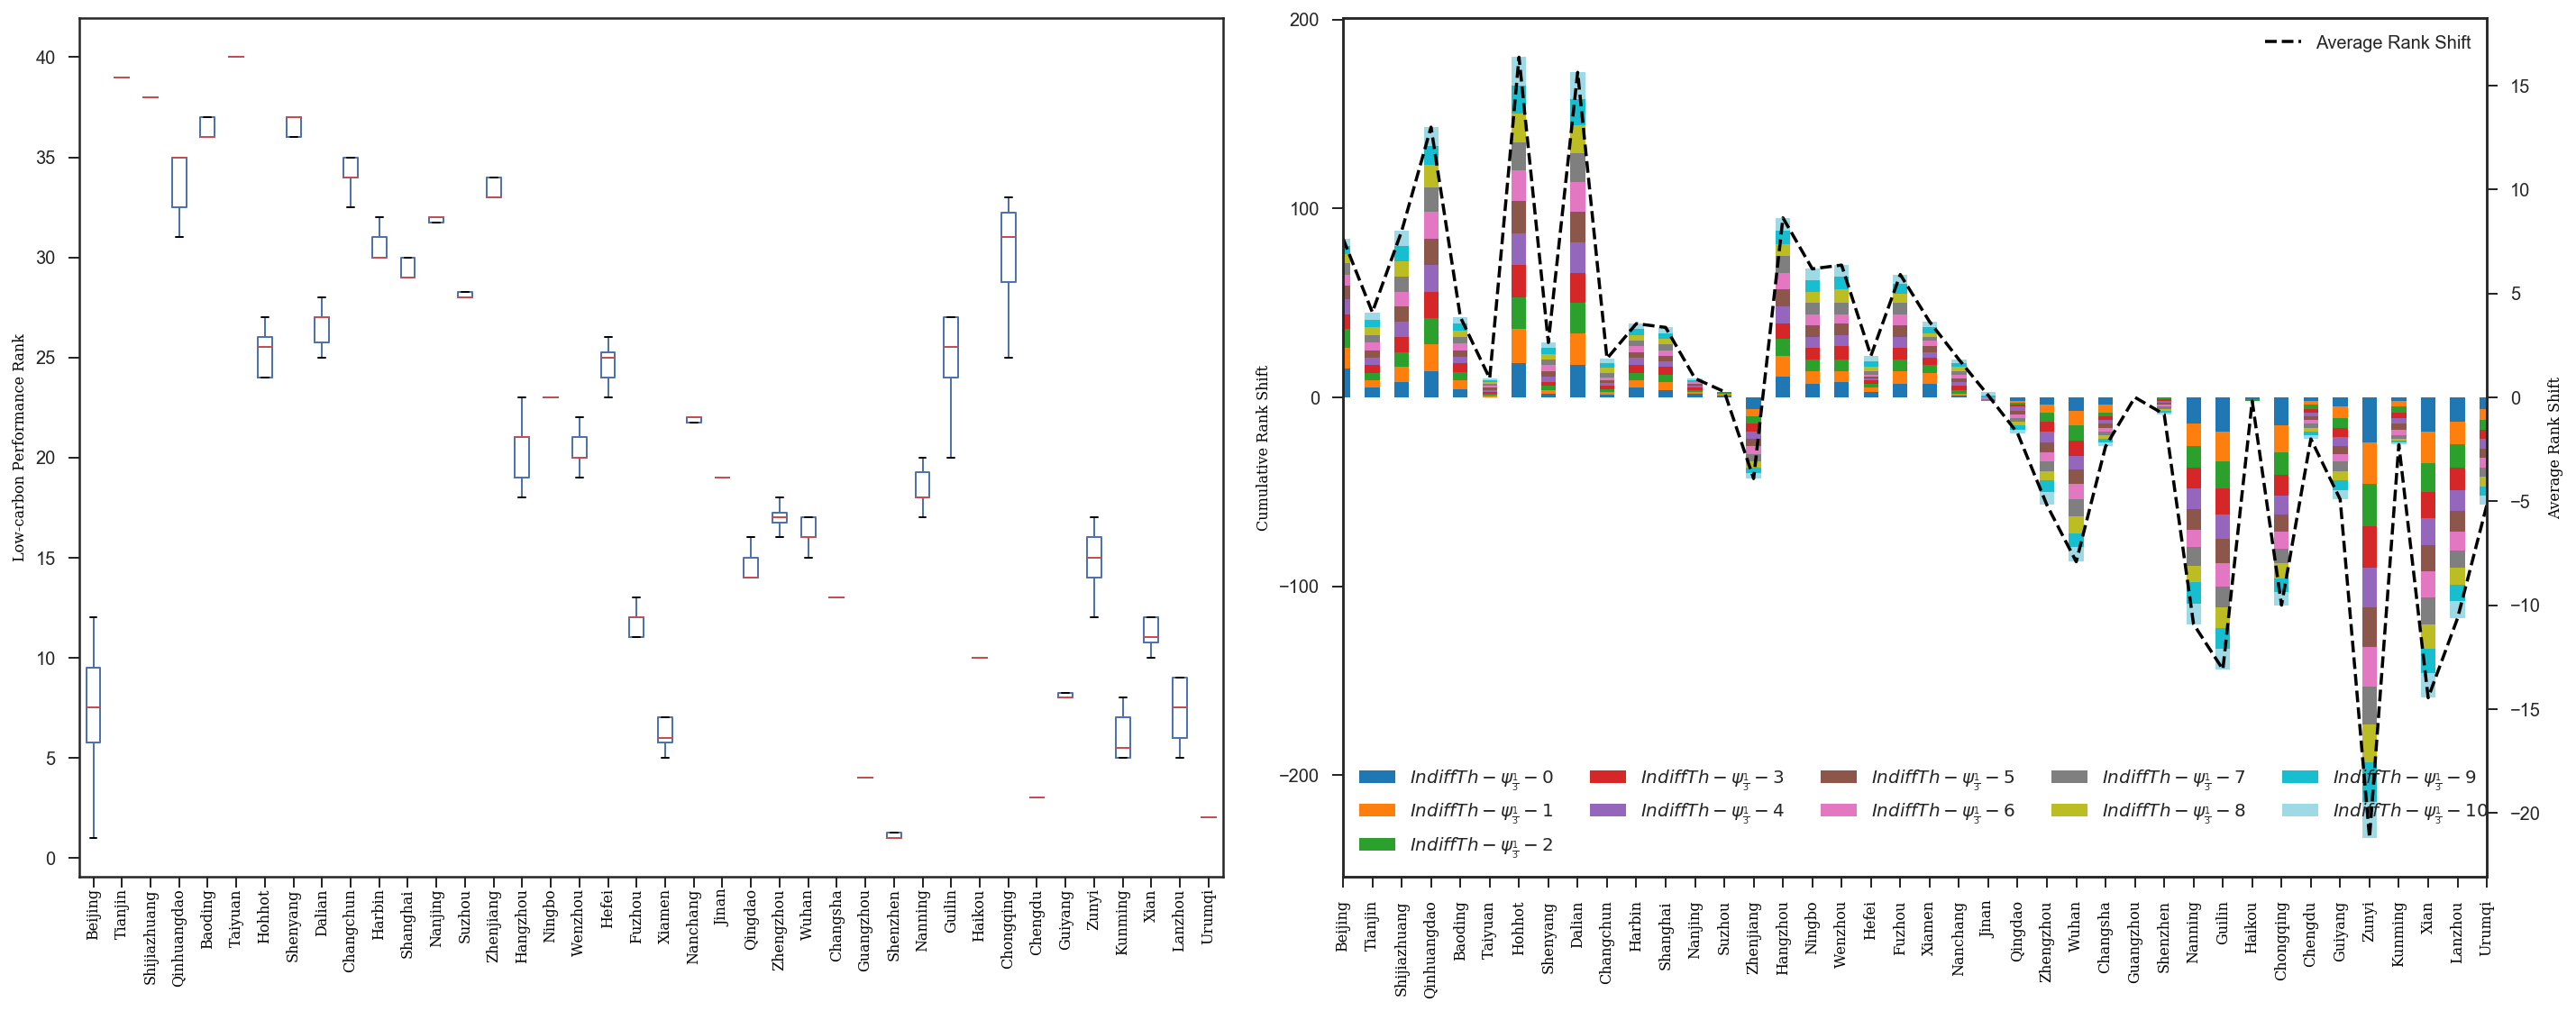

In [11]:
fig_indiff_thres_phi03 = rank_boxplot_cumulative_shift(indiff_thres_phi03_data_trans, labels_indiff_thres_phi03)

In [15]:
fig_indiff_thres_phi03.savefig('../results/fig_indiff_thres_phi03_pre_10_1.pdf')

# latter 10

In [53]:
indiff_thres_phi03_latter_path = os.path.join(os.path.abspath('..'), 'results', 
                                                       'outranking_matrix','indifference_threhold_00_10_phi0.3', 
                                                       'total_rank_latter_10.csv')

if os.path.exists(indiff_thres_phi03_latter_path):
    print('File path: ', indiff_thres_phi03_latter_path)
else:
    print('Check the path')

indiff_thres_phi03_latter_data = pd.read_csv(indiff_thres_phi03_latter_path, index_col = 0)

indiff_thres_phi03_latter_data.head()

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/indifference_threhold_00_10_phi0.3/total_rank_latter_10.csv


,thres_ref,indiff_threshold_00,indiff_threshold_01,indiff_threshold_02,indiff_threshold_03,indiff_threshold_04,indiff_threshold_05,indiff_threshold_06,indiff_threshold_07,indiff_threshold_08,indiff_threshold_09,indiff_threshold_10
Beijing,2,5,3.0,2,2,2,2,2,2,2,1,1
Tianjin,29,39,39.0,39,39,38,38,38,37,36,36,35
Shijiazhuang,33,38,38.0,37,37,35,36,35,35,31,30,30
Qinhuangdao,27,31,31.0,31,30,28,28,26,25,25,24,21
Baoding,36,36,35.5,34,34,34,33,32,33,34,33,32


In [54]:
indiff_thres_phi03_latter_data_trans = indiff_thres_phi03_latter_data.T

indiff_thres_phi03_latter_data_trans.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
thres_ref,2.0,29.0,33.0,27.0,36.0,40.0,13.0,31.0,9.0,28.0,...,39.0,7.0,38.0,8.0,10.0,37.0,5.0,24.0,23.0,16.0
indiff_threshold_00,5.0,39.0,38.0,31.0,36.0,40.0,24.0,37.0,25.0,35.0,...,27.0,10.0,33.0,3.0,8.0,17.0,7.0,12.0,9.0,2.0
indiff_threshold_01,3.0,39.0,38.0,31.0,35.5,40.0,24.0,37.0,25.0,33.0,...,27.0,10.0,35.5,4.0,8.0,21.0,7.0,12.0,11.0,2.0
indiff_threshold_02,2.0,39.0,37.0,31.0,34.0,40.0,21.0,38.0,25.0,33.0,...,27.0,10.0,36.0,5.0,9.0,23.0,7.0,13.0,11.0,3.0
indiff_threshold_03,2.0,39.0,37.0,30.0,34.0,40.0,18.0,36.0,22.0,32.0,...,31.0,10.0,38.0,6.0,9.0,25.0,8.0,13.0,11.0,4.0


In [55]:
labels_indiff_thres_phi03_latter = [r'$IndiffTh-\psi_\frac{1}{3}-0$', 
                                    r'$IndiffTh-\psi_\frac{1}{3}-1$',
                                    r'$IndiffTh-\psi_\frac{1}{3}-2$',
                                    r'$IndiffTh-\psi_\frac{1}{3}-3$', 
                                    r'$IndiffTh-\psi_\frac{1}{3}-4$', 
                                    r'$IndiffTh-\psi_\frac{1}{3}-5$',
                                    r'$IndiffTh-\psi_\frac{1}{3}-6$', 
                                    r'$IndiffTh-\psi_\frac{1}{3}-7$', 
                                    r'$IndiffTh-\psi_\frac{1}{3}-8$',
                                    r'$IndiffTh-\psi_\frac{1}{3}-9$', 
                                    r'$IndiffTh-\psi_\frac{1}{3}-10$']

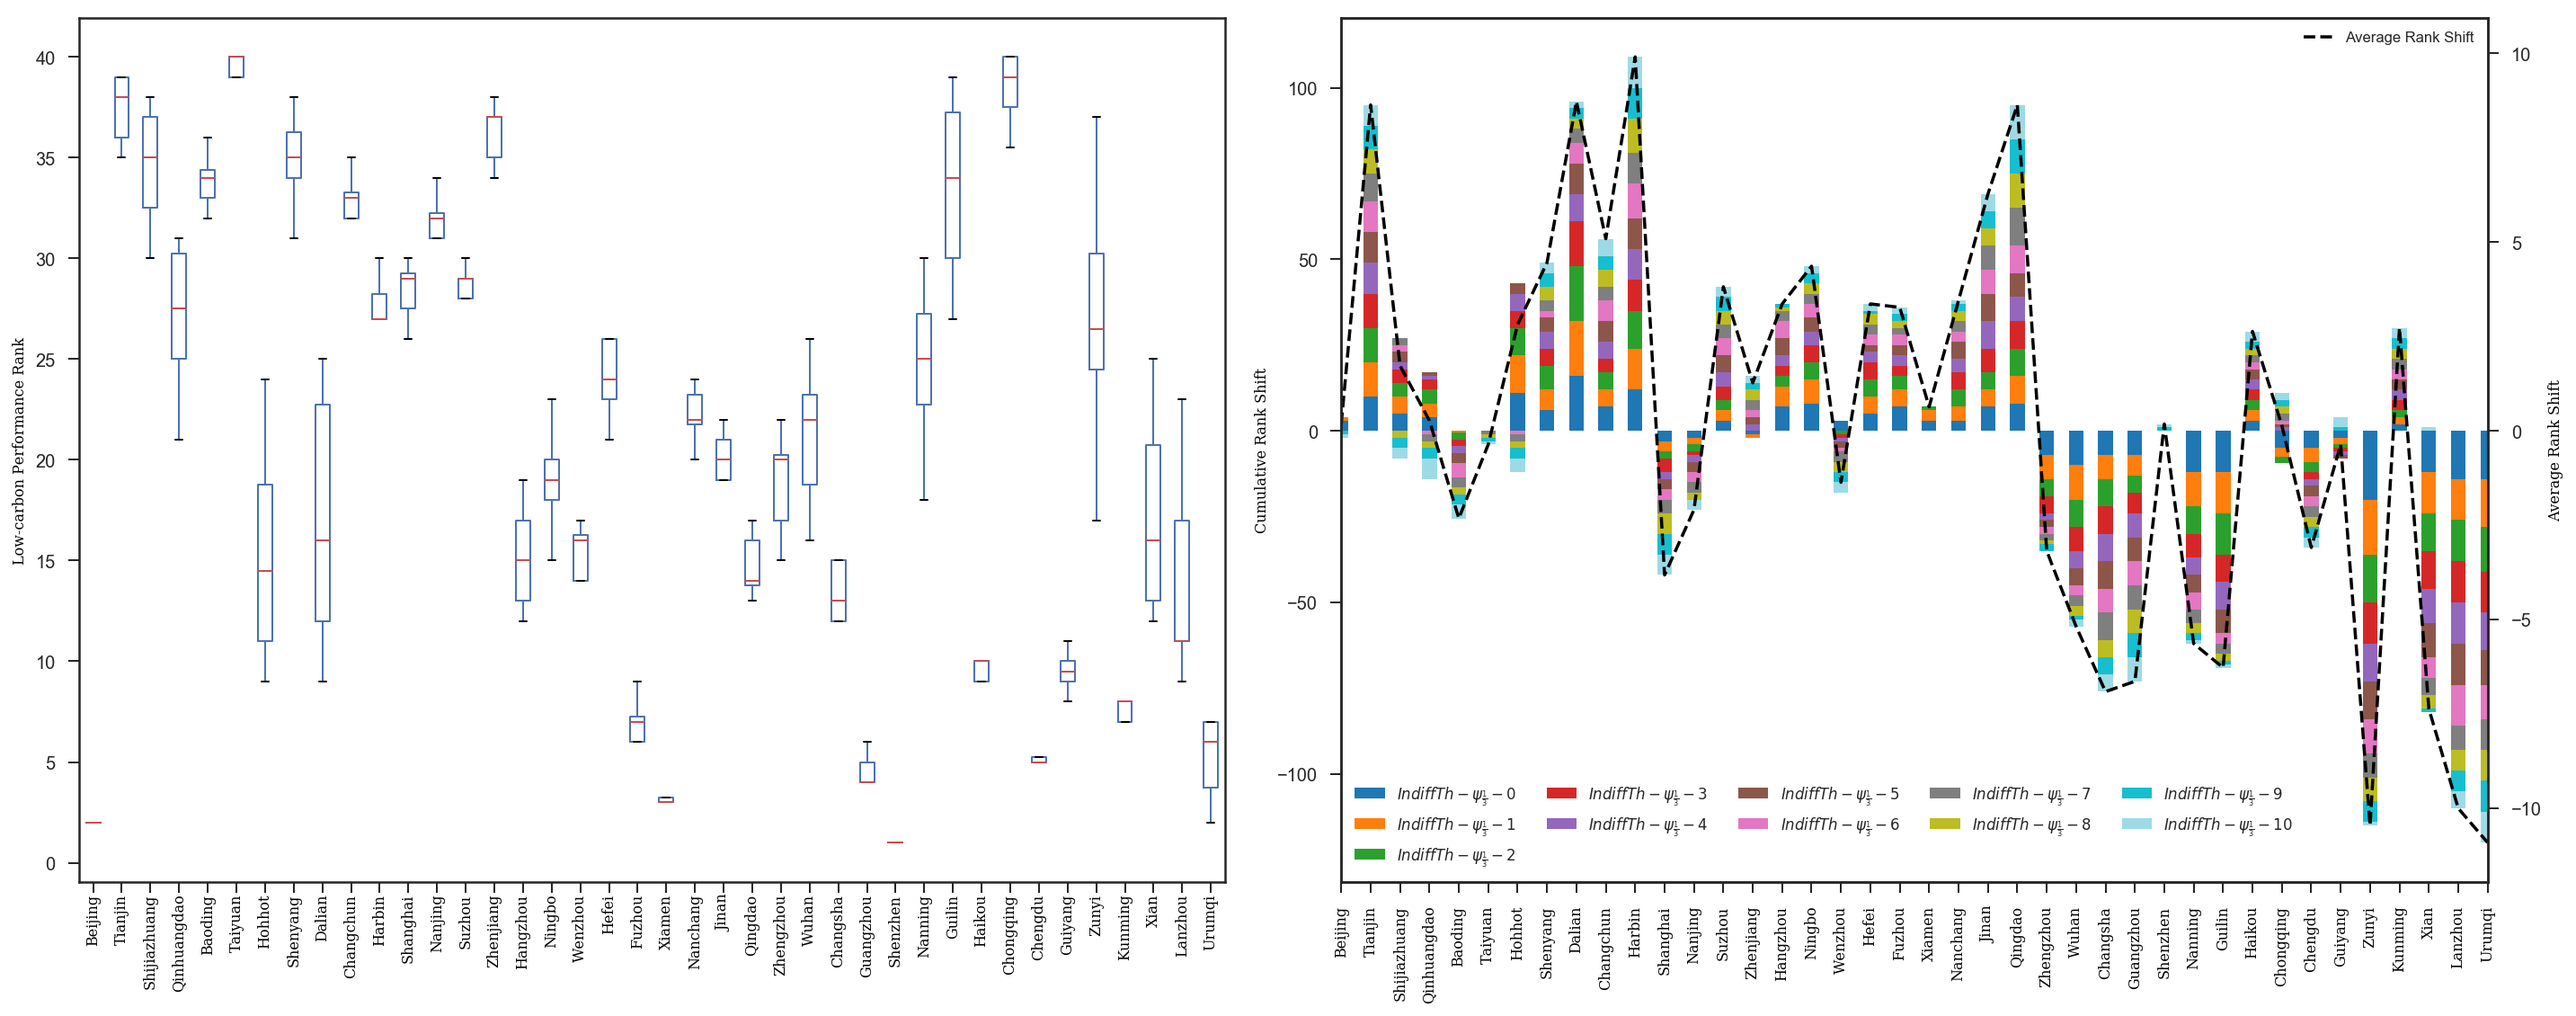

In [56]:
fig_indiff_thres_phi03_latter = rank_boxplot_cumulative_shift(indiff_thres_phi03_latter_data_trans, 
                                                              labels_indiff_thres_phi03_latter)

In [57]:
fig_indiff_thres_phi03_latter.savefig('../results/fig_indiff_thres_phi03_latter_10.pdf')

# indifference_threhold_00_10_phi0.6
## pre_10

In [58]:
indiff_thres_phi06_path = os.path.join(os.path.abspath('..'), 'results', 
                                                       'outranking_matrix','indifference_threhold_00_10_phi0.6', 
                                                       'total_rank_pre_10.csv')

if os.path.exists(indiff_thres_phi06_path):
    print('File path: ', indiff_thres_phi06_path)
else:
    print('Check the path')

indiff_thres_phi06_data = pd.read_csv(indiff_thres_phi06_path, index_col = 0)

indiff_thres_phi06_data.head()

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/indifference_threhold_00_10_phi0.6/total_rank_pre_10.csv


,thres_ref,indiff_threshold_00,indiff_threshold_01,indiff_threshold_02,indiff_threshold_03,indiff_threshold_04,indiff_threshold_05,indiff_threshold_06,indiff_threshold_07,indiff_threshold_08,indiff_threshold_09,indiff_threshold_10
Beijing,2,1,1,1.0,1,1,1,1,1,1,1,1
Tianjin,29,4,7,9.0,9,8,8,10,10,10,10,10
Shijiazhuang,33,8,8,8.0,8,9,11,11,12,12,13,13
Qinhuangdao,27,5,6,6.0,6,6,7,7,7,7,8,8
Baoding,36,12,12,11.0,15,15,18,18,18,18,18,19


In [59]:
indiff_thres_phi06_data.equals(indiff_thres_phi03_data)

False

In [60]:
indiff_thres_phi06_data_trans = indiff_thres_phi06_data.T

indiff_thres_phi06_data_trans.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
thres_ref,2.0,29.0,33.0,27.0,36.0,40.0,13.0,31.0,9.0,28.0,...,39.0,7.0,38.0,8.0,10.0,37.0,5.0,24.0,23.0,16.0
indiff_threshold_00,1.0,4.0,8.0,5.0,12.0,19.0,3.0,13.0,2.0,16.0,...,37.0,29.0,40.0,23.0,33.0,39.0,32.0,38.0,36.0,34.0
indiff_threshold_01,1.0,7.0,8.0,6.0,12.0,19.0,5.0,13.0,2.0,18.0,...,38.0,28.0,40.0,22.0,33.0,39.0,32.0,37.0,36.0,34.0
indiff_threshold_02,1.0,9.0,8.0,6.0,11.0,19.0,5.0,15.0,3.0,18.0,...,38.0,27.0,40.0,21.0,32.5,39.0,31.0,37.0,36.0,34.0
indiff_threshold_03,1.0,9.0,8.0,6.0,15.0,19.0,5.0,16.0,4.0,20.0,...,38.0,27.0,40.0,18.0,33.0,39.0,31.0,37.0,36.0,32.0


In [61]:
labels_indiff_thres_phi06 = [r'$IndiffTh-\psi_\frac{1}{6}-0$',
                             r'$IndiffTh-\psi_\frac{1}{6}-1$',
                             r'$IndiffTh-\psi_\frac{1}{6}-2$',
                             r'$IndiffTh-\psi_\frac{1}{6}-3$',
                             r'$IndiffTh-\psi_\frac{1}{6}-4$',
                             r'$IndiffTh-\psi_\frac{1}{6}-5$',
                             r'$IndiffTh-\psi_\frac{1}{6}-6$',
                             r'$IndiffTh-\psi_\frac{1}{6}-7$',
                             r'$IndiffTh-\psi_\frac{1}{6}-8$',
                             r'$IndiffTh-\psi_\frac{1}{6}-9$',
                             r'$IndiffTh-\psi_\frac{1}{6}-10$']

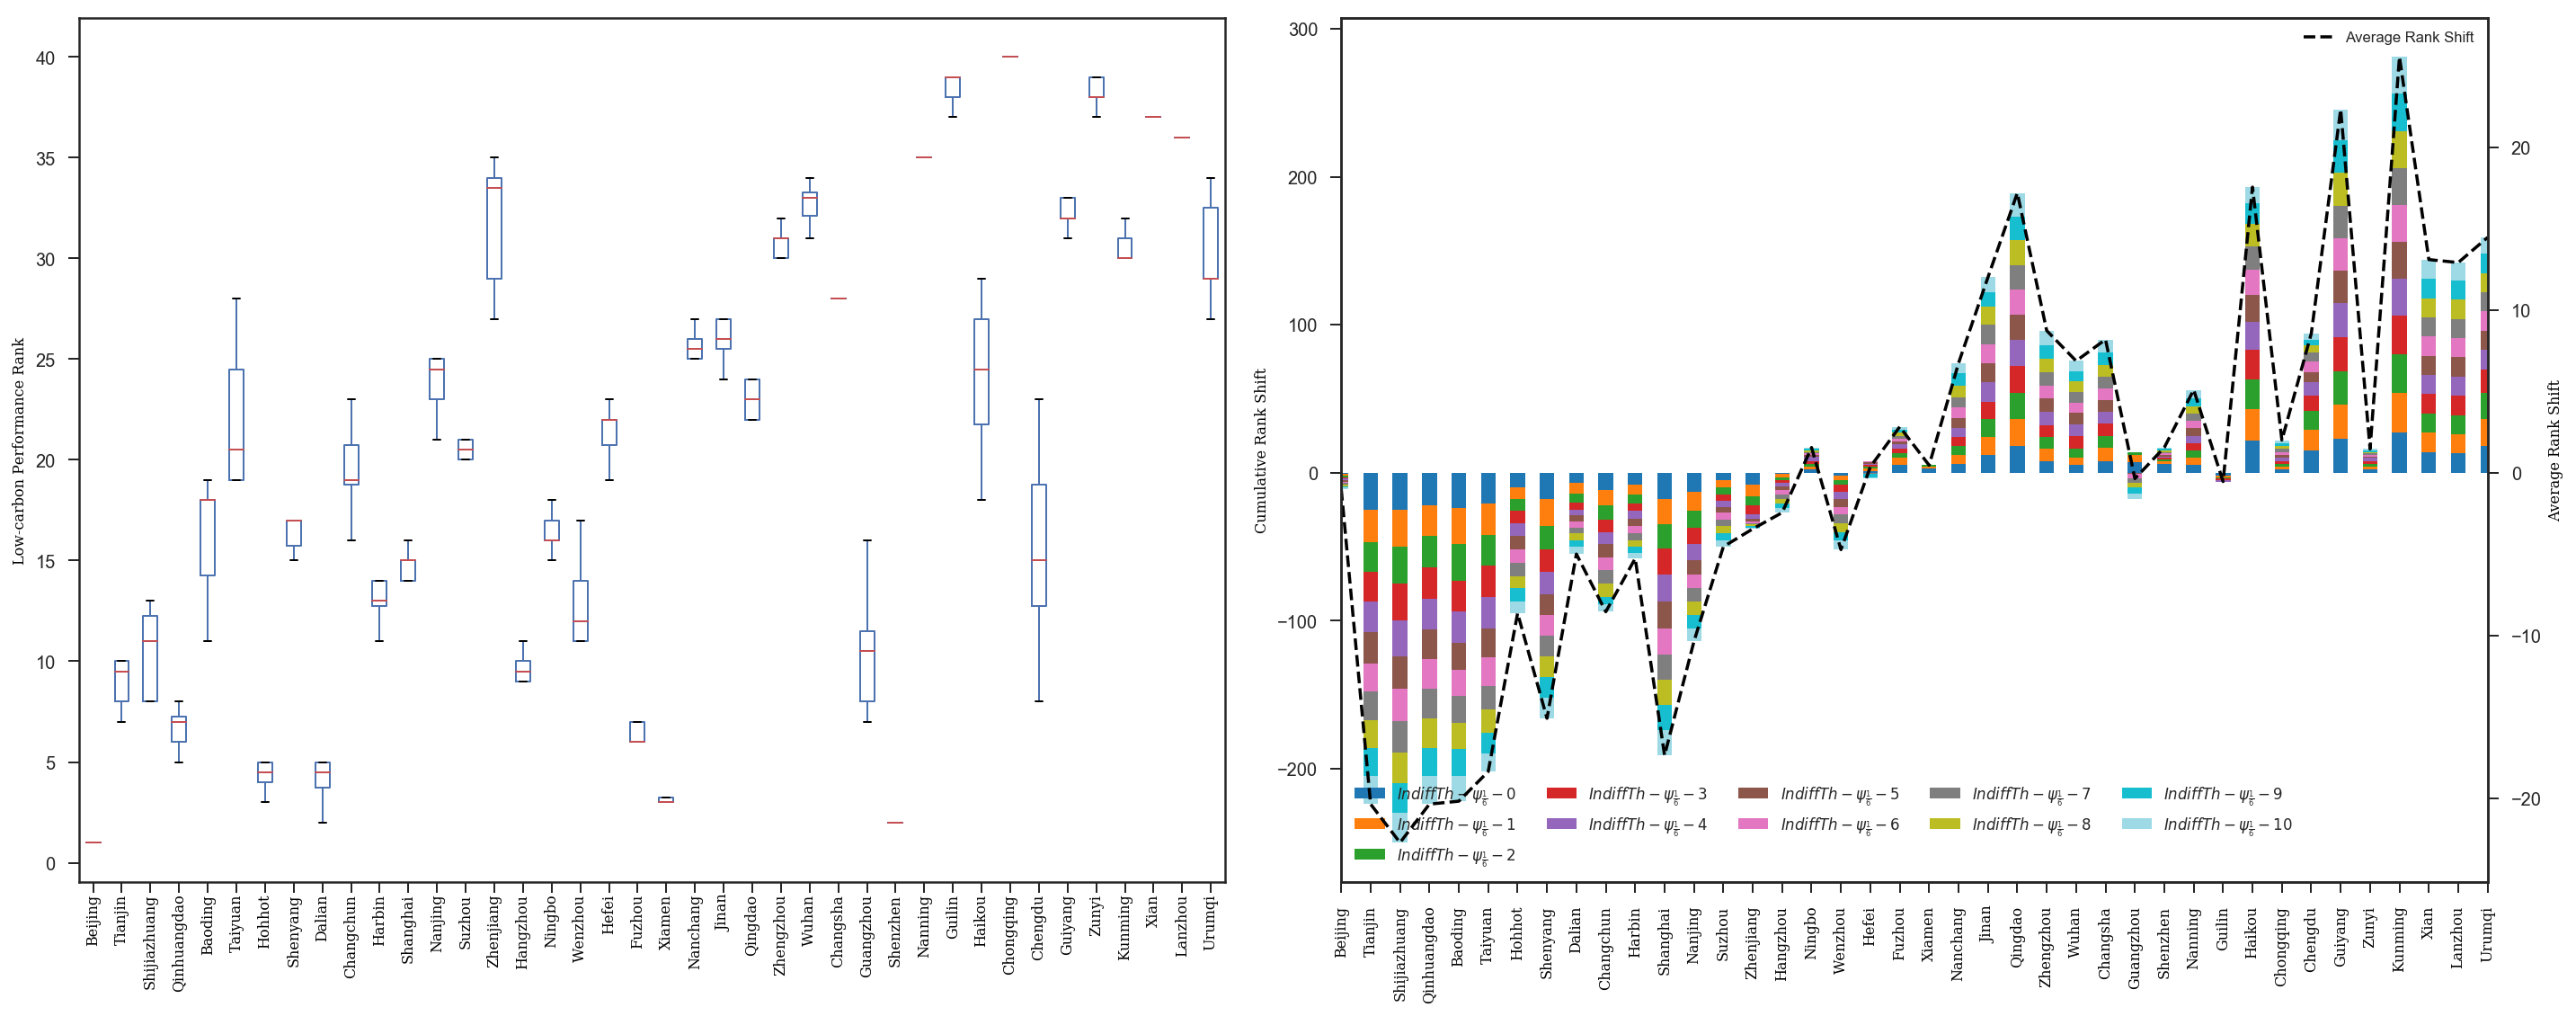

In [62]:
fig_indiff_thres_phi06 = rank_boxplot_cumulative_shift(indiff_thres_phi06_data_trans, labels_indiff_thres_phi06)

In [63]:
fig_indiff_thres_phi06.savefig('../results/fig_indiff_thres_phi06_pre_10.pdf')

# latter 10

In [64]:
indiff_thres_phi06_latter_path = os.path.join(os.path.abspath('..'), 'results', 
                                                       'outranking_matrix','indifference_threhold_00_10_phi0.6', 
                                                       'total_rank_latter_10.csv')

if os.path.exists(indiff_thres_phi06_latter_path):
    print('File path: ', indiff_thres_phi06_latter_path)
else:
    print('Check the path')

indiff_thres_phi06_latter_data = pd.read_csv(indiff_thres_phi06_latter_path, index_col = 0)

indiff_thres_phi06_latter_data.head()

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/indifference_threhold_00_10_phi0.6/total_rank_latter_10.csv


,thres_ref,indiff_threshold_00,indiff_threshold_01,indiff_threshold_02,indiff_threshold_03,indiff_threshold_04,indiff_threshold_05,indiff_threshold_06,indiff_threshold_07,indiff_threshold_08,indiff_threshold_09,indiff_threshold_10
Beijing,2,1,1.0,1.0,1,1.0,1,1,1,1.0,1,1
Tianjin,29,10,12.0,12.0,16,18.5,23,26,28,29.0,32,35
Shijiazhuang,33,13,14.5,16.5,19,23.0,25,28,29,30.0,30,30
Qinhuangdao,27,8,9.0,10.0,11,11.0,13,14,18,20.0,20,21
Baoding,36,19,20.0,22.5,28,28.0,32,33,31,33.0,33,32


In [65]:
indiff_thres_phi06_latter_data_trans = indiff_thres_phi06_latter_data.T

indiff_thres_phi06_latter_data_trans.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
thres_ref,2.0,29.0,33.0,27.0,36.0,40.0,13.0,31.0,9.0,28.0,...,39.0,7.0,38.0,8.0,10.0,37.0,5.0,24.0,23.0,16.0
indiff_threshold_00,1.0,10.0,13.0,8.0,19.0,28.0,5.0,17.0,4.0,23.0,...,39.0,18.0,40.0,12.0,31.0,38.0,30.0,37.0,35.0,27.0
indiff_threshold_01,1.0,12.0,14.5,9.0,20.0,31.0,5.0,17.0,4.0,26.0,...,39.0,18.0,40.0,10.0,30.0,38.0,25.0,37.0,35.0,23.0
indiff_threshold_02,1.0,12.0,16.5,10.0,22.5,33.0,5.0,20.0,4.0,28.0,...,39.0,16.5,40.0,9.0,30.0,38.0,21.0,37.0,34.0,18.0
indiff_threshold_03,1.0,16.0,19.0,11.0,28.0,34.0,6.0,24.0,5.0,30.0,...,39.0,12.0,40.0,8.0,25.0,38.0,18.0,37.0,33.0,14.0


In [66]:
labels_indiff_thres_phi06_latter = [r'$IndiffTh-\psi_\frac{1}{6}-0$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-1$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-2$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-3$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-4$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-5$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-6$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-7$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-8$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-9$',
                                    r'$IndiffTh-\psi_\frac{1}{6}-10$']

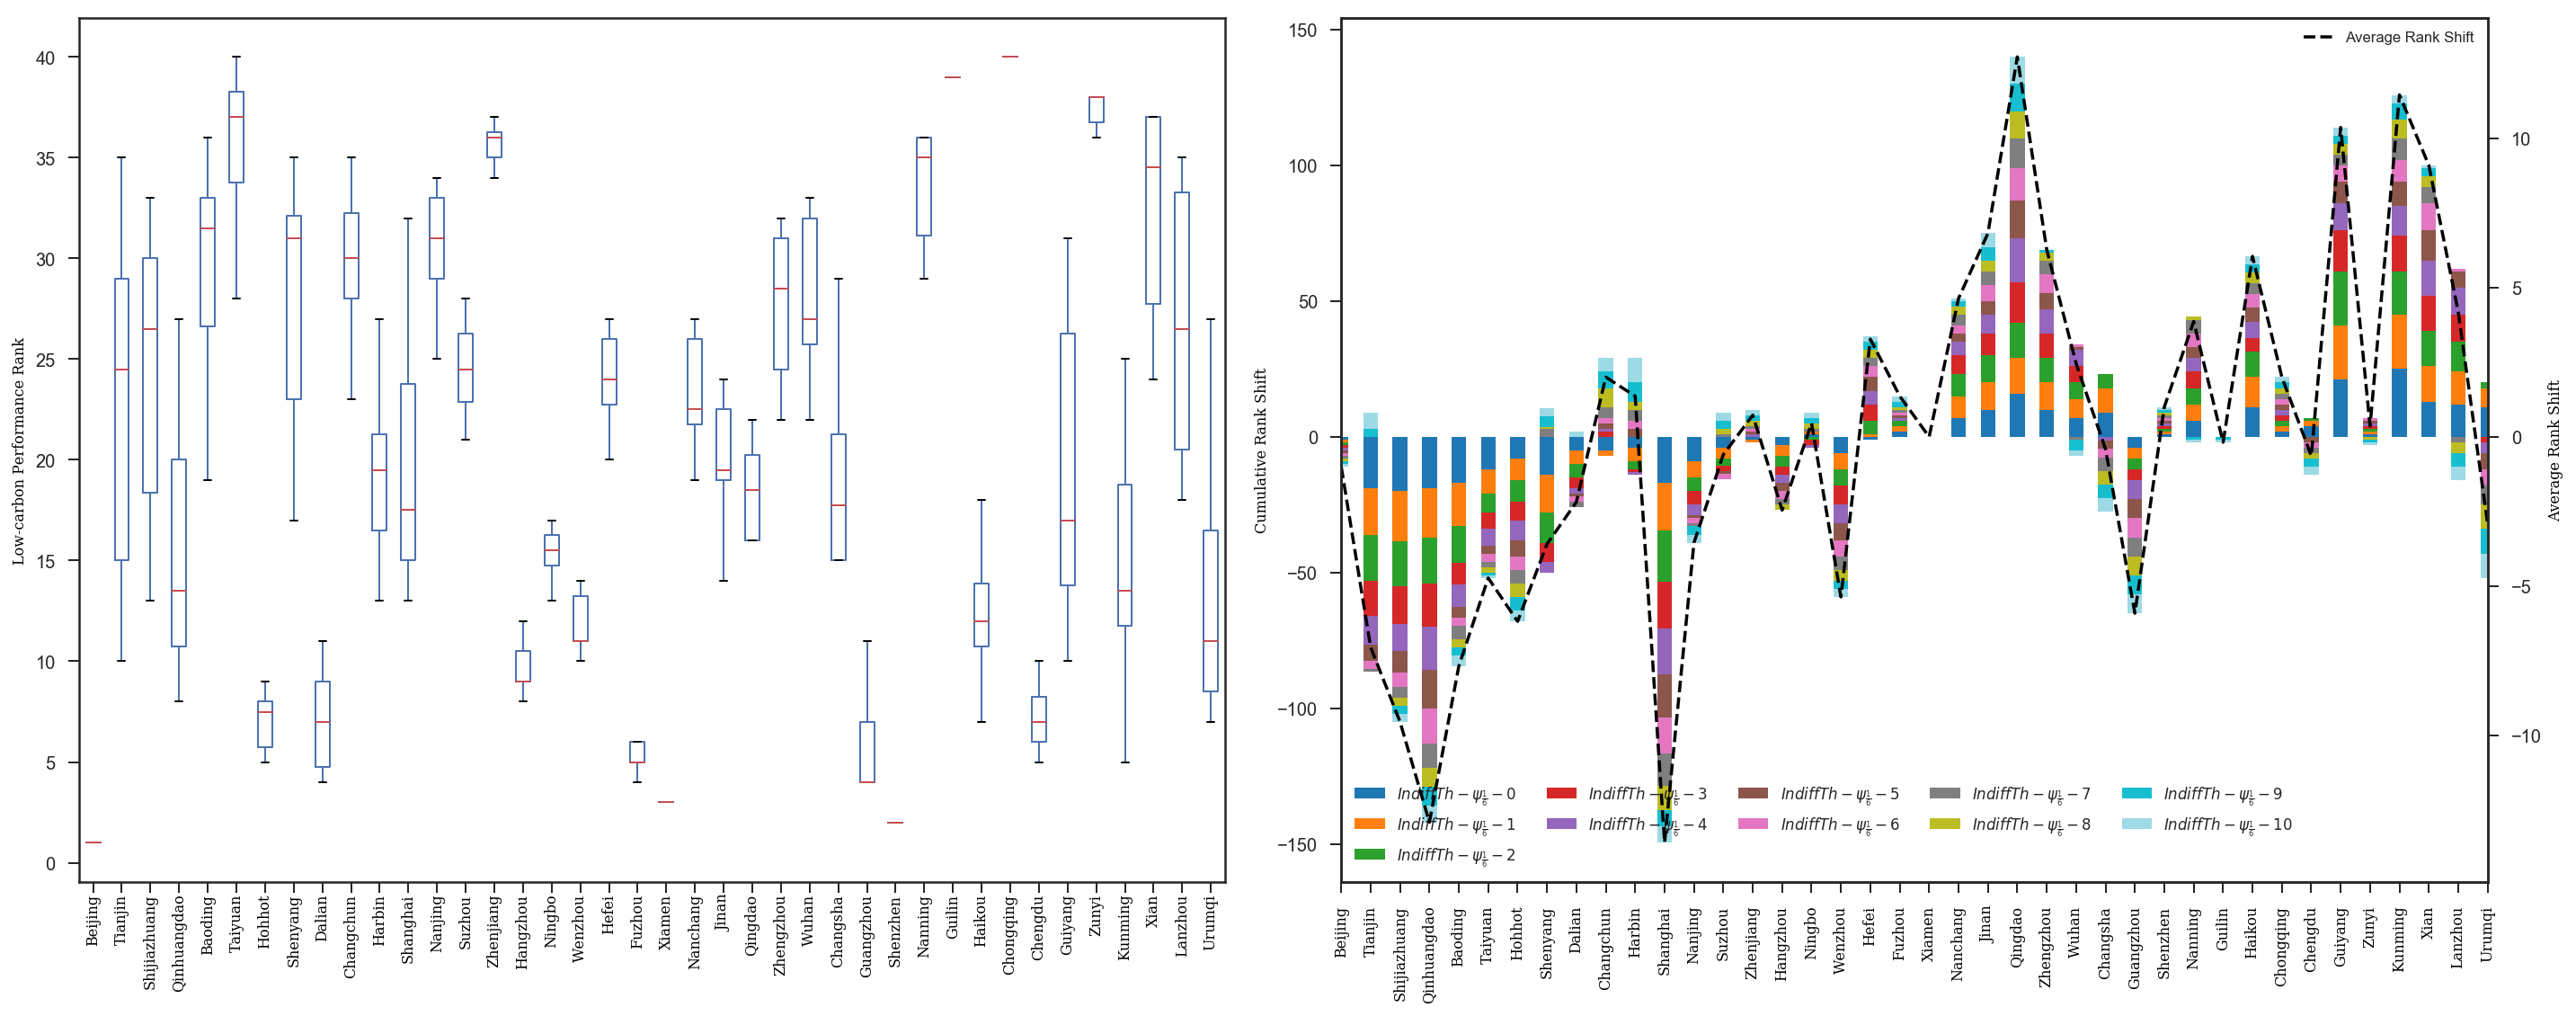

In [67]:
fig_indiff_thres_phi06_latter = rank_boxplot_cumulative_shift(indiff_thres_phi06_latter_data_trans, 
                                                              labels_indiff_thres_phi06_latter)

In [68]:
fig_indiff_thres_phi06_latter.savefig('../results/fig_indiff_thres_phi06_latter_10.pdf')

# preference_threshod_00_10_phi0.3

In [16]:
pref_thres_phi03_path = os.path.join(os.path.abspath('..'), 'results', 
                                     'outranking_matrix','preference_threshod_00_10_phi0.3',
                                     'total_rank_1.csv')

if os.path.exists(pref_thres_phi03_path):
    print('File path: ', pref_thres_phi03_path)
else:
    print('Check the path')

pref_thres_phi03_data = pd.read_csv(pref_thres_phi03_path, index_col = 0)

pref_thres_phi03_data.head()

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/preference_threshod_00_10_phi0.3/total_rank_1.csv


,thres_ref,pref_threshold_00,pref_threshold_01,pref_threshold_02,pref_threshold_03,pref_threshold_04,pref_threshold_05,pref_threshold_06,pref_threshold_07,pref_threshold_08,pref_threshold_09,pref_threshold_10
Beijing,1.0,1,1.0,1,1,1,1,2,2,2,3,5
Tianjin,35.0,33,37.0,37,38,38,39,38,39,39,39,39
Shijiazhuang,30.0,28,30.0,31,33,35,34,36,36,36,38,38
Qinhuangdao,21.0,25,25.0,25,29,27,27,28,28,30,31,31
Baoding,32.5,29,28.0,30,30,30,31,33,33,33,33,36


In [17]:
pref_thres_phi03_data_trans = pref_thres_phi03_data.T

pref_thres_phi03_data_trans.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
thres_ref,1.0,35.0,30.0,21.0,32.5,39.0,9.0,34.0,11.0,32.5,...,38.0,10.0,40.0,5.0,13.0,36.0,8.0,25.0,18.0,7.0
pref_threshold_00,1.0,33.0,28.0,25.0,29.0,39.0,11.0,36.0,7.0,34.0,...,37.0,15.0,40.0,8.0,9.0,31.0,6.0,20.0,21.0,10.0
pref_threshold_01,1.0,37.0,30.0,25.0,28.0,39.0,11.0,35.0,7.0,33.0,...,36.0,15.0,40.0,8.0,9.5,31.0,6.0,18.0,20.0,9.5
pref_threshold_02,1.0,37.0,31.0,25.0,30.0,39.0,13.0,36.0,7.0,34.0,...,35.0,15.0,40.0,8.0,10.0,28.0,6.0,16.0,18.0,9.0
pref_threshold_03,1.0,38.0,33.0,29.0,30.0,39.0,15.0,36.0,9.0,35.0,...,32.0,13.0,40.0,7.0,10.0,28.0,6.0,17.0,16.0,8.0


In [18]:
labels_pref_thres_phi03 = [r'$PrefTh-\psi_\frac{1}{3}-0$',
                           r'$PrefTh-\psi_\frac{1}{3}-1$',
                           r'$PrefTh-\psi_\frac{1}{3}-2$',
                           r'$PrefTh-\psi_\frac{1}{3}-3$',
                           r'$PrefTh-\psi_\frac{1}{3}-4$',
                           r'$PrefTh-\psi_\frac{1}{3}-5$',
                           r'$PrefTh-\psi_\frac{1}{3}-6$',
                           r'$PrefTh-\psi_\frac{1}{3}-7$',
                           r'$PrefTh-\psi_\frac{1}{3}-8$',
                           r'$PrefTh-\psi_\frac{1}{3}-9$',
                           r'$PrefTh-\psi_\frac{1}{3}-10$']

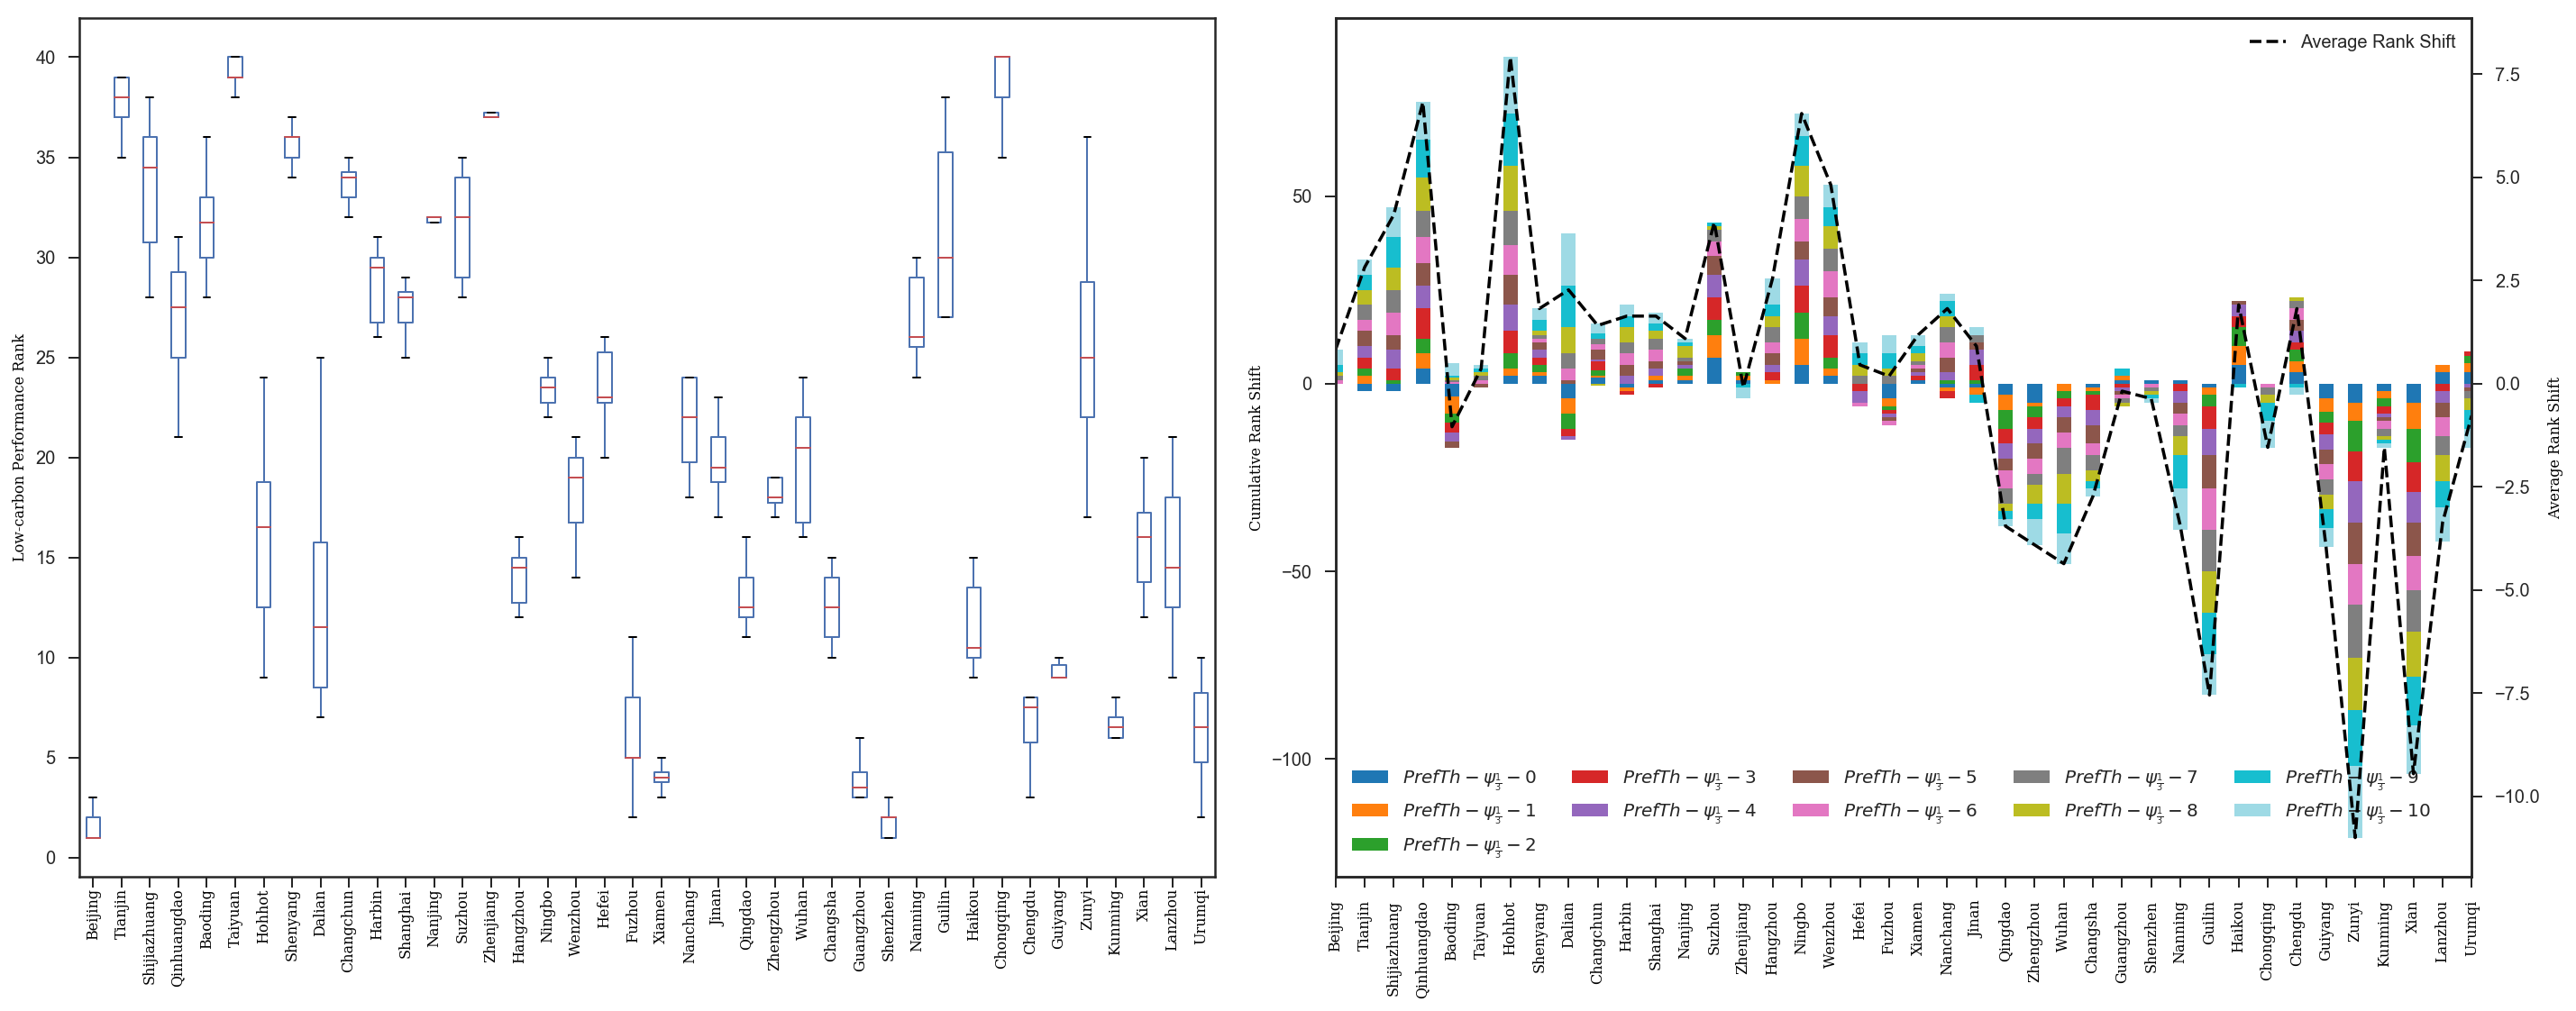

In [19]:
fig_pref_thres_phi03 = rank_boxplot_cumulative_shift(pref_thres_phi03_data_trans,
                                                     labels_pref_thres_phi03)

In [20]:
fig_pref_thres_phi03.savefig('../results/fig_pref_thres_phi03_1.pdf')

# preference_threshod_00_10_phi0.6

In [74]:
pref_thres_phi06_path = os.path.join(os.path.abspath('..'), 'results', 
                                     'outranking_matrix','preference_threshod_00_10_phi0.6',
                                     'total_rank.csv')

if os.path.exists(pref_thres_phi06_path):
    print('File path: ', pref_thres_phi06_path)
else:
    print('Check the path')

pref_thres_phi06_data = pd.read_csv(pref_thres_phi06_path, index_col = 0)

pref_thres_phi06_data.head()

File path:  /Users/rolf/Downloads/noncomp/rank/results/outranking_matrix/preference_threshod_00_10_phi0.6/total_rank.csv


,thres_ref,equal_threshold_00,equal_threshold_01,equal_threshold_02,equal_threshold_03,equal_threshold_04,equal_threshold_05,equal_threshold_06,equal_threshold_07,equal_threshold_08,equal_threshold_09,equal_threshold_10
Beijing,2,1,1,1,1,1,1,1,1,1,1,1
Tianjin,29,33,34,30,32,31,31,27,24,20,12,10
Shijiazhuang,33,28,28,28,28,26,22,21,18,12,13,13
Qinhuangdao,27,25,24,23,23,19,17,12,10,10,9,8
Baoding,36,29,29,29,29,28,27,28,29,28,23,19


In [75]:
pref_thres_phi06_data_trans = pref_thres_phi06_data.T

pref_thres_phi06_data_trans.head()

,Beijing,Tianjin,Shijiazhuang,Qinhuangdao,Baoding,Taiyuan,Hohhot,Shenyang,Dalian,Changchun,...,Guilin,Haikou,Chongqing,Chengdu,Guiyang,Zunyi,Kunming,Xian,Lanzhou,Urumqi
thres_ref,2,29,33,27,36,40,13,31,9,28,...,39,7,38,8,10,37,5,24,23,16
equal_threshold_00,1,33,28,25,29,39,11,36,7,34,...,37,15,40,8,9,31,6,20,21,10
equal_threshold_01,1,34,28,24,29,39,9,35,6,30,...,37,16,40,8,10,36,7,23,25,11
equal_threshold_02,1,30,28,23,29,37,9,35,6,31,...,39,15,40,7,12,36,8,24,27,10
equal_threshold_03,1,32,28,23,29,37,8,35,5,30,...,39,16,40,7,13,36,9,27,26,10


In [76]:
labels_pref_thres_phi06 = [r'$PrefTh-\psi_\frac{1}{6}-0$',
                           r'$PrefTh-\psi_\frac{1}{6}-1$',
                           r'$PrefTh-\psi_\frac{1}{6}-2$',
                           r'$PrefTh-\psi_\frac{1}{6}-3$',
                           r'$PrefTh-\psi_\frac{1}{6}-4$',
                           r'$PrefTh-\psi_\frac{1}{6}-5$',
                           r'$PrefTh-\psi_\frac{1}{6}-6$',
                           r'$PrefTh-\psi_\frac{1}{6}-7$',
                           r'$PrefTh-\psi_\frac{1}{6}-8$',
                           r'$PrefTh-\psi_\frac{1}{6}-9$',
                           r'$PrefTh-\psi_\frac{1}{6}-10$']

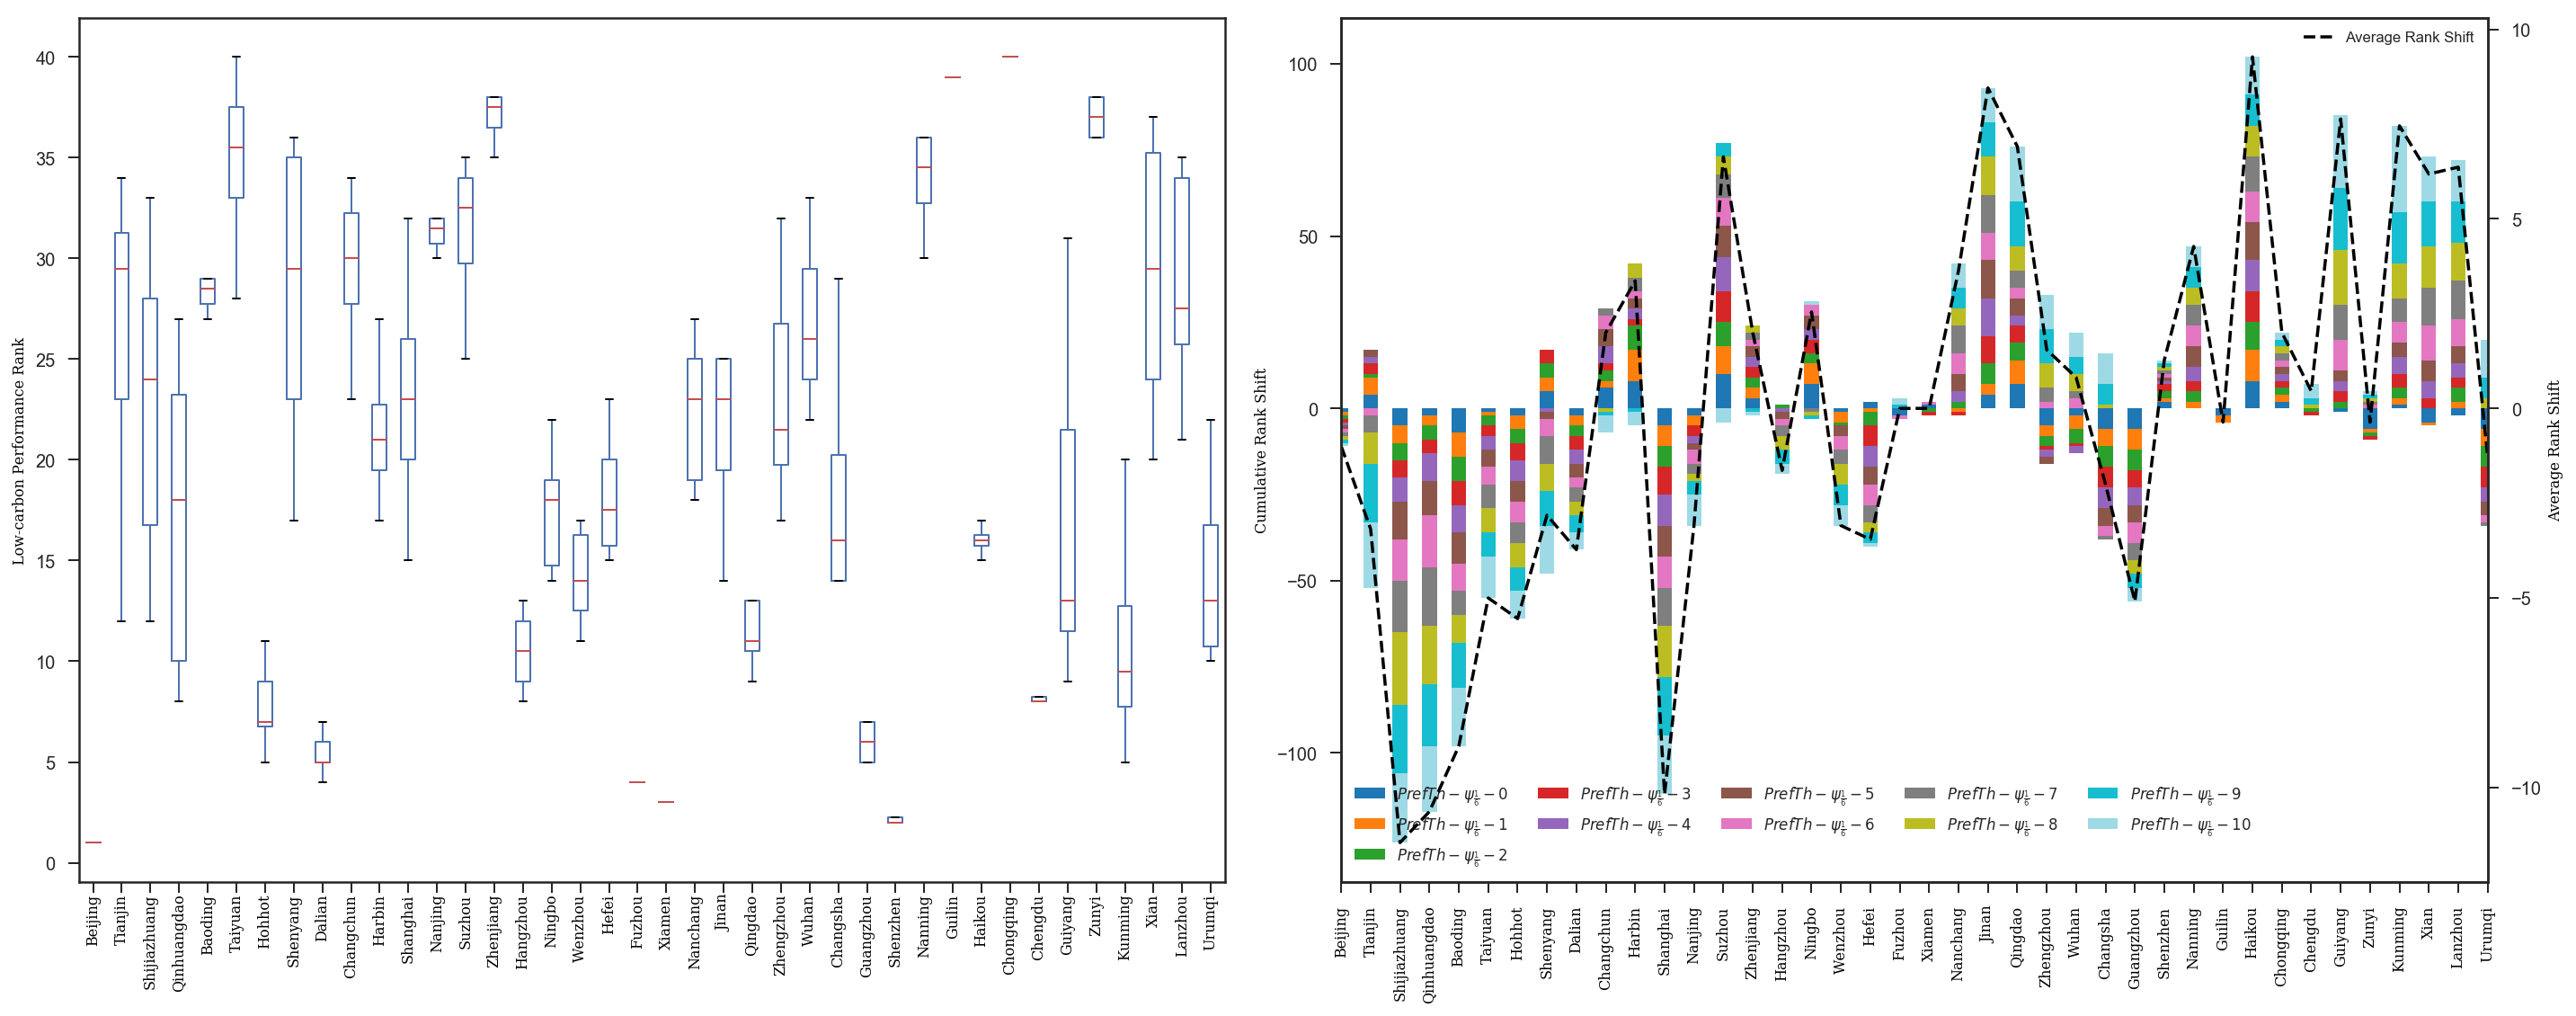

In [77]:
fig_pref_thres_phi06 = rank_boxplot_cumulative_shift(pref_thres_phi06_data_trans,
                                                     labels_pref_thres_phi06)

In [78]:
fig_pref_thres_phi06.savefig('../results/fig_pref_thres_phi06.pdf')